<a href="https://www.kaggle.com/code/adityajha2005/neo-hazards?scriptVersionId=190855542" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv')

In [3]:
df.head(7)


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True


In [4]:
df.tail()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False
338198,54460573,(2024 NH3),22.951,0.068290,0.152700,Earth,42060.357830,7.126682e+06,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [7]:
df.describe

<bound method NDFrame.describe of           neo_id                name  absolute_magnitude  \
0        2162117  162117 (1998 SD15)              19.140   
1        2349507    349507 (2008 QY)              18.500   
2        2455415    455415 (2003 GA)              21.450   
3        3132126           (2002 PB)              20.630   
4        3557844           (2011 DW)              22.700   
...          ...                 ...                 ...   
338194  54403809          (2023 VS4)              28.580   
338195  54415298          (2023 XW5)              28.690   
338196  54454871          (2024 KJ7)              21.919   
338197  54456245           (2024 NE)              23.887   
338198  54460573          (2024 NH3)              22.951   

        estimated_diameter_min  estimated_diameter_max orbiting_body  \
0                     0.394962                0.883161         Earth   
1                     0.530341                1.185878         Earth   
2                     0.13631

In [8]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [9]:
df = df.drop(['neo_id','name','orbiting_body'],axis=1)



In [10]:
df.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [11]:
df.duplicated().sum()
df.drop_duplicates(keep="first",inplace = True)


In [12]:
X = df.drop(['is_hazardous'],axis=1)
Y=df['is_hazardous']
Y

0         False
1          True
2         False
3         False
4         False
          ...  
338194    False
338195    False
338196    False
338197    False
338198    False
Name: is_hazardous, Length: 338166, dtype: bool

In [13]:
print(X.columns)


Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')


In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
feature_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']
Target_column='is_hazardous'

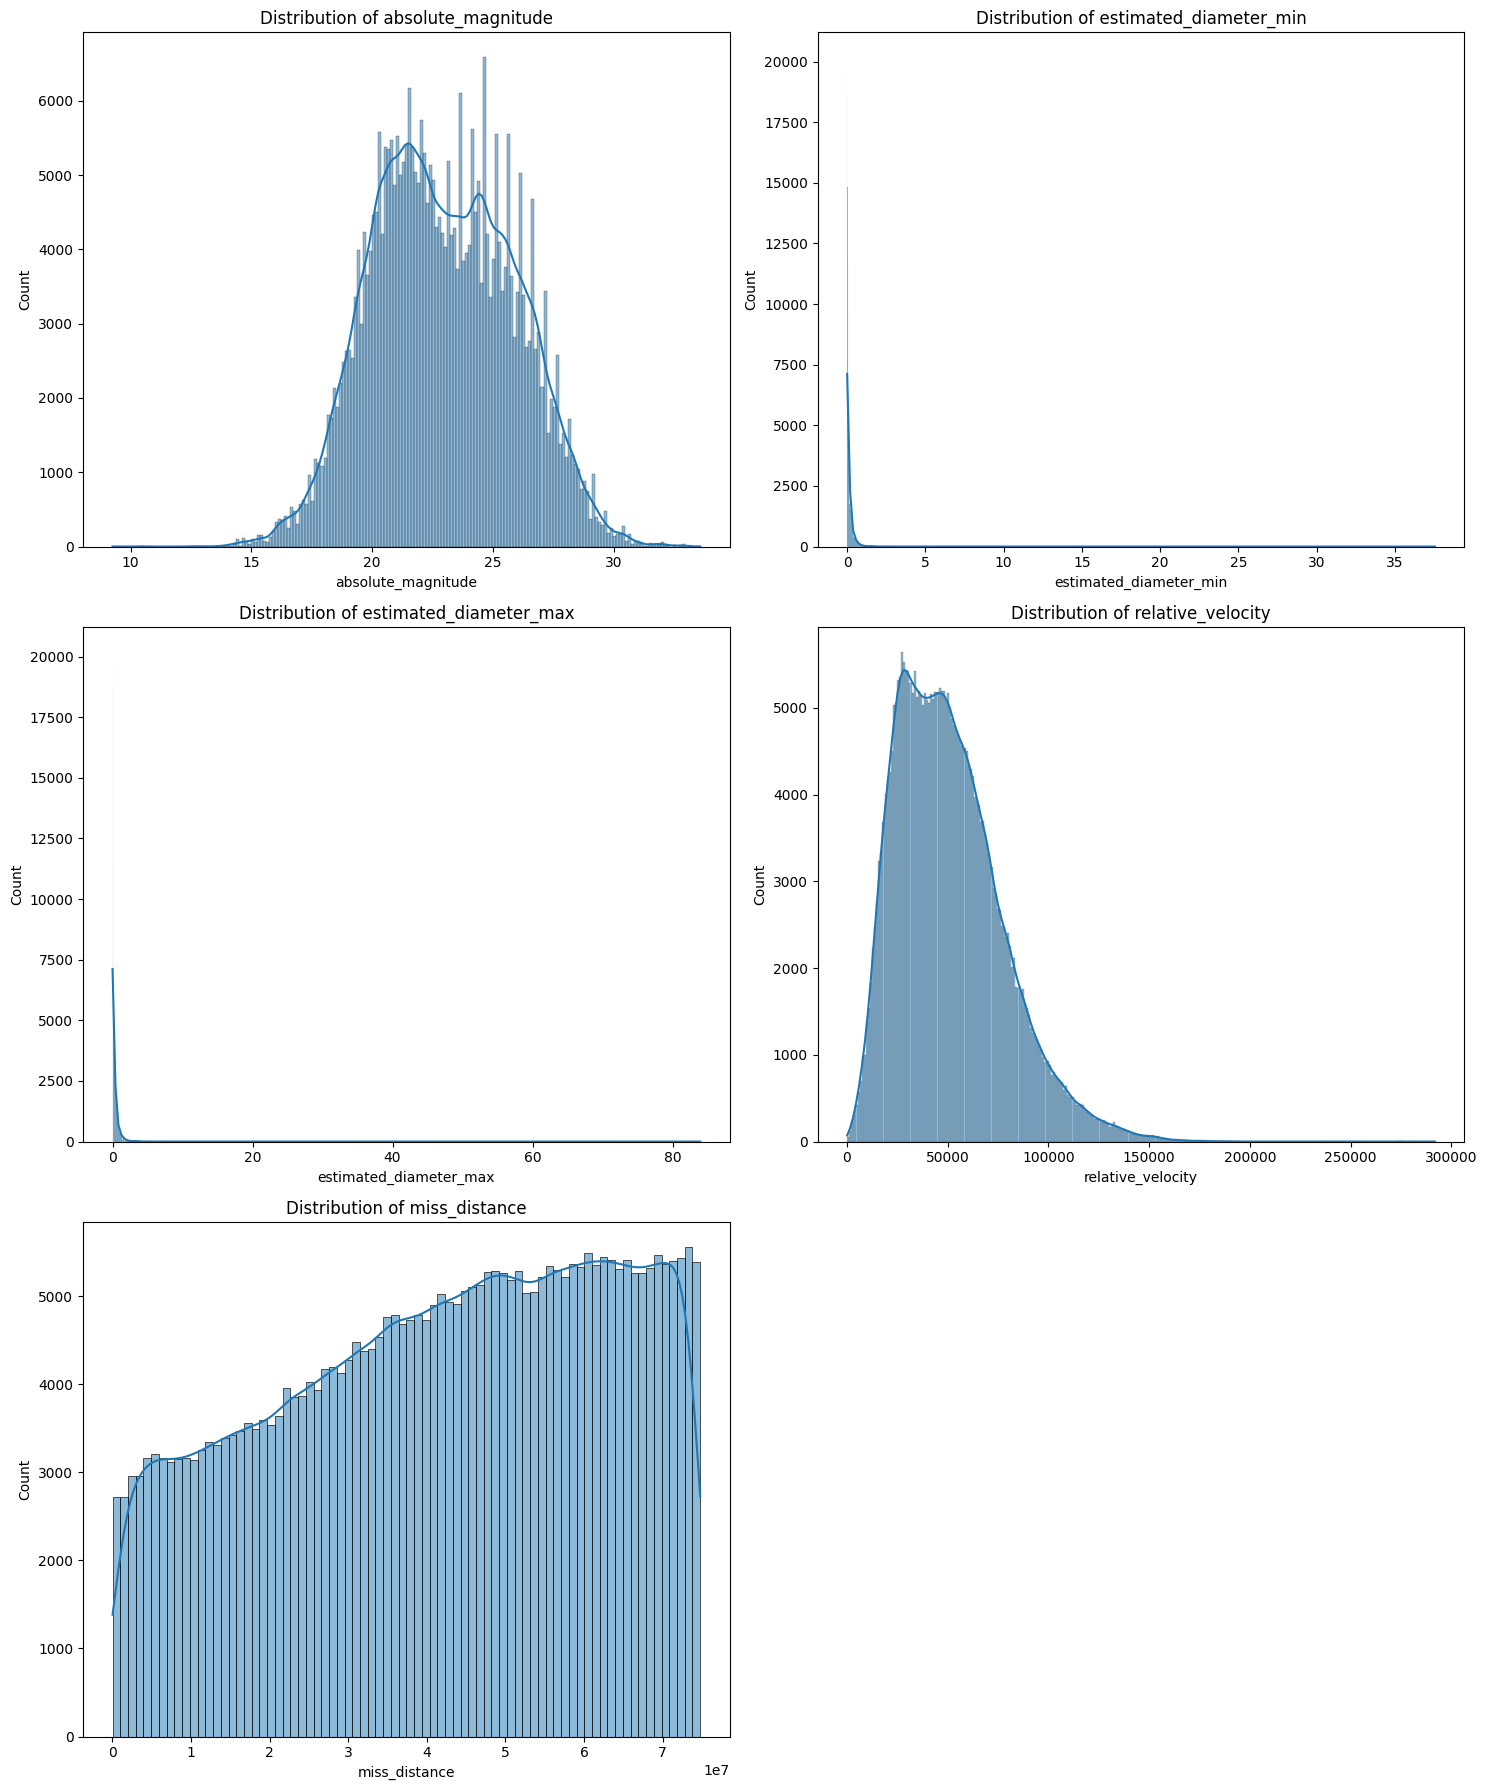

In [15]:
plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

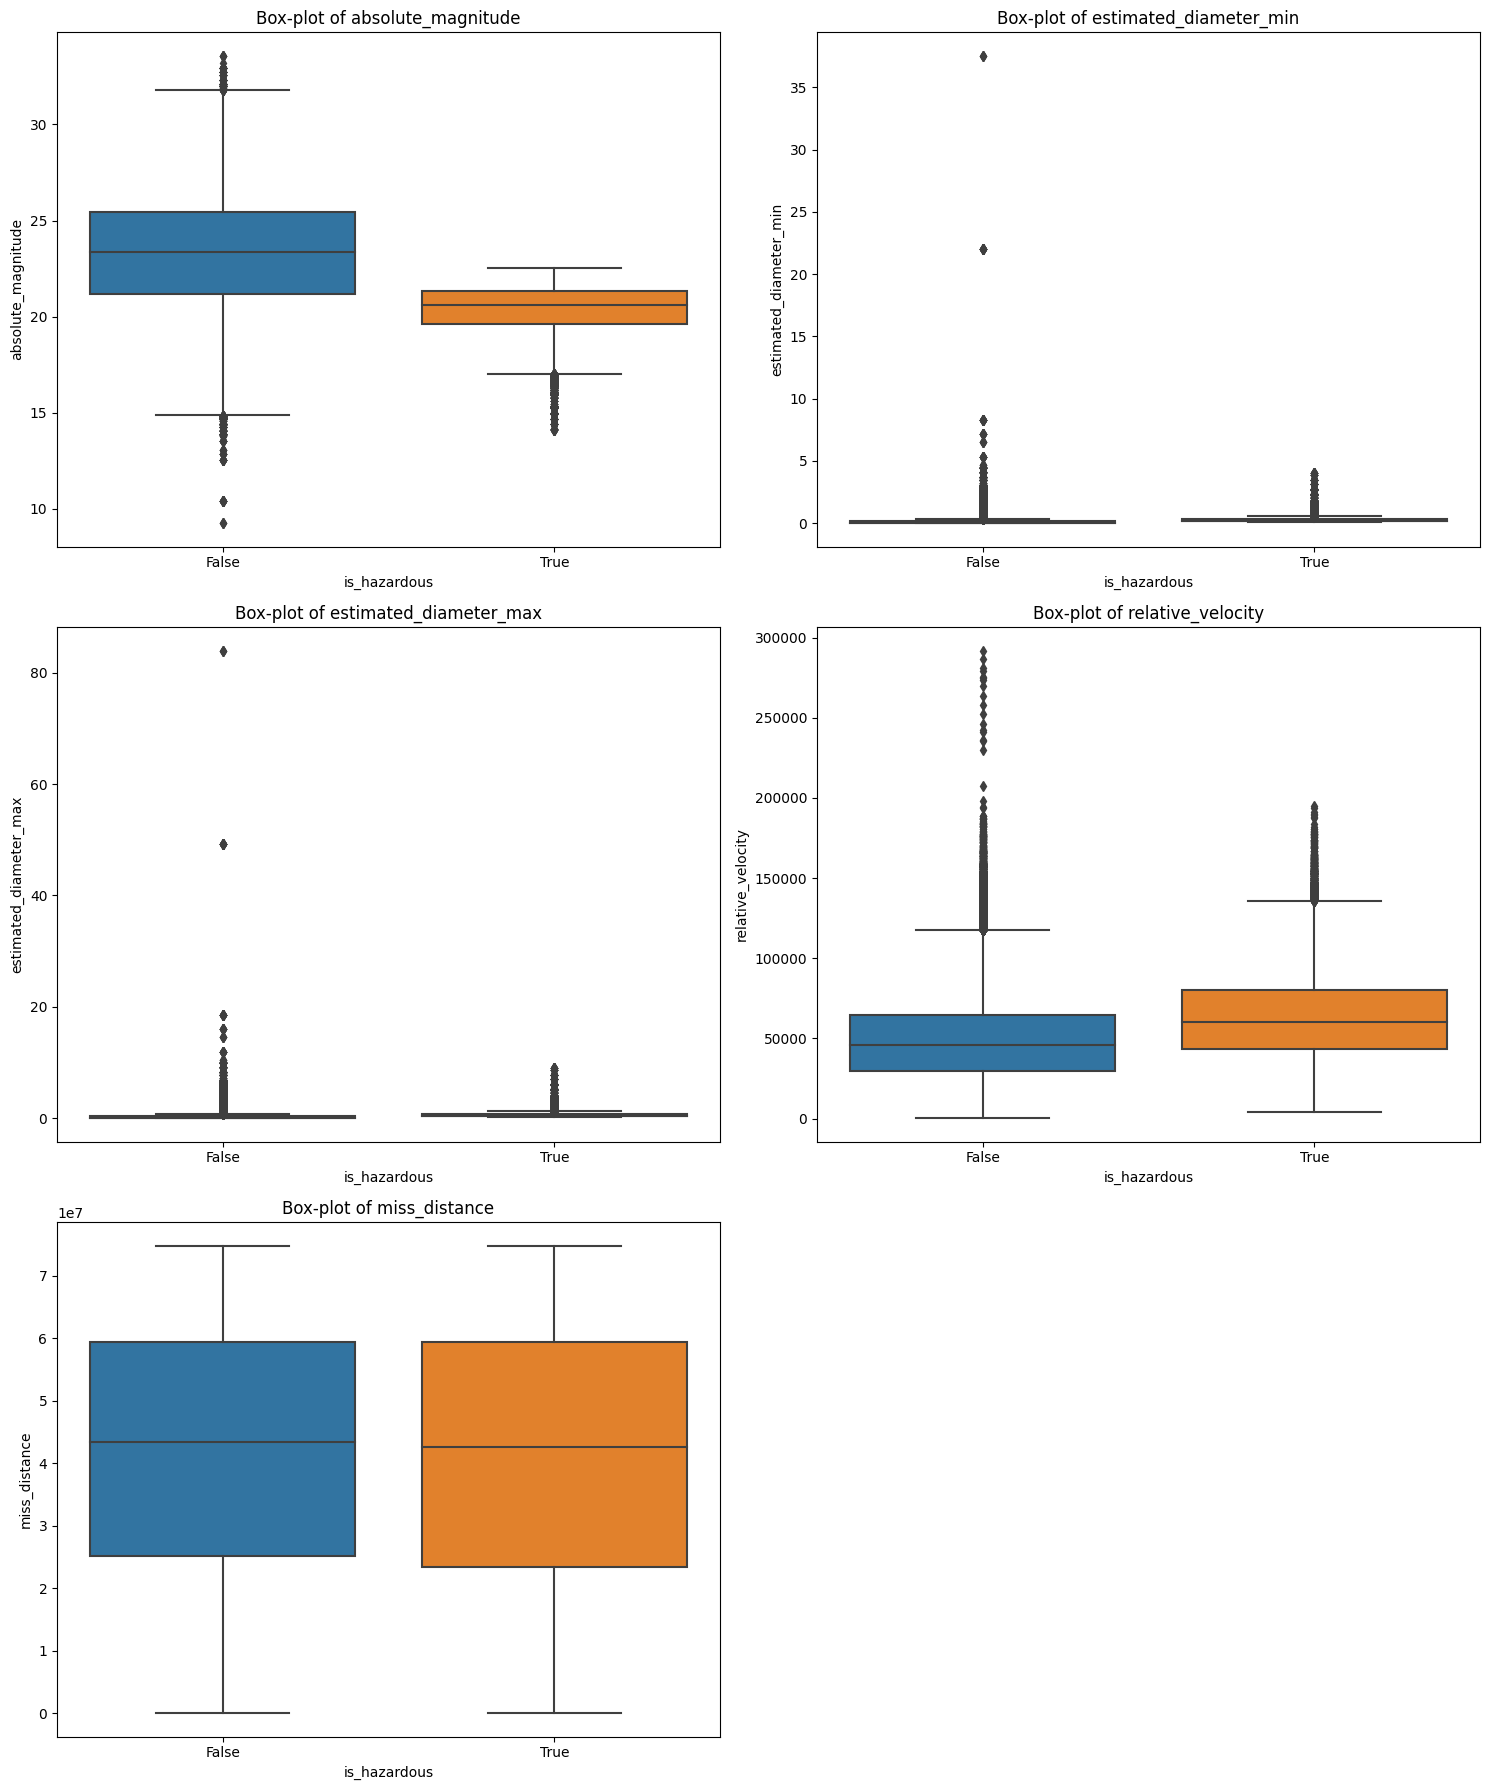

In [16]:

plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=Target_column,y=column,data=df)
    plt.title('Box-plot of {}'.format(column))
plt.tight_layout()
plt.show()

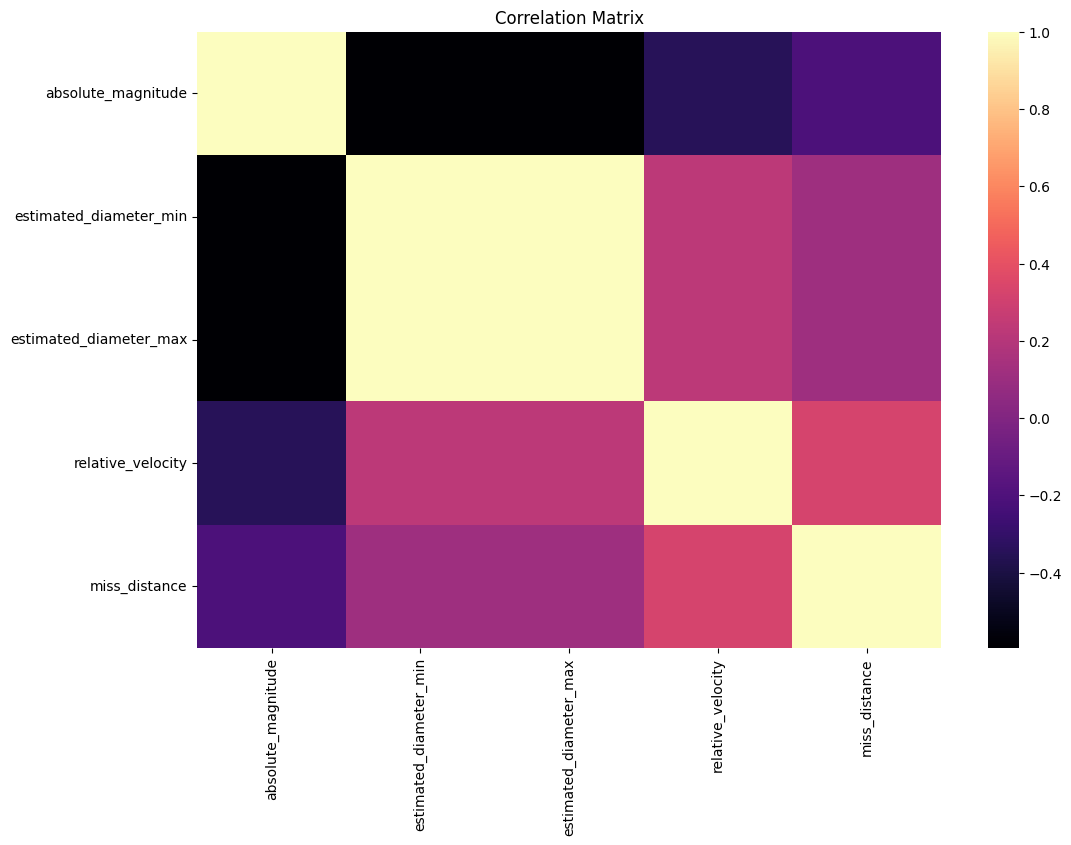

In [17]:
plt.figure(figsize=(12,8))
correlation_maxtrix = df[feature_columns].corr()
sns.heatmap(correlation_maxtrix , annot=False , cmap='magma')
plt.title('Correlation Matrix')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [19]:

scaler = StandardScaler()

X = scaler.fit_transform(X)


In [20]:
# X=X.dropna()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [22]:
import sklearn.metrics as mt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [23]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(Y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     58989
           1       0.72      0.59      0.65      8645

    accuracy                           0.92     67634
   macro avg       0.83      0.78      0.80     67634
weighted avg       0.91      0.92      0.92     67634



****OUTLIER REMOVAL****


In [24]:
def remove_outlier(df,columns):
    for col in columns:
        Q3 = df[col].quantile(.75)
        Q1 = df[col].quantile(.25)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df


In [25]:
data=remove_outlier(df,feature_columns)
data

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [26]:
rows_removed = df.shape[0] - data.shape[0]
print(rows_removed)

389


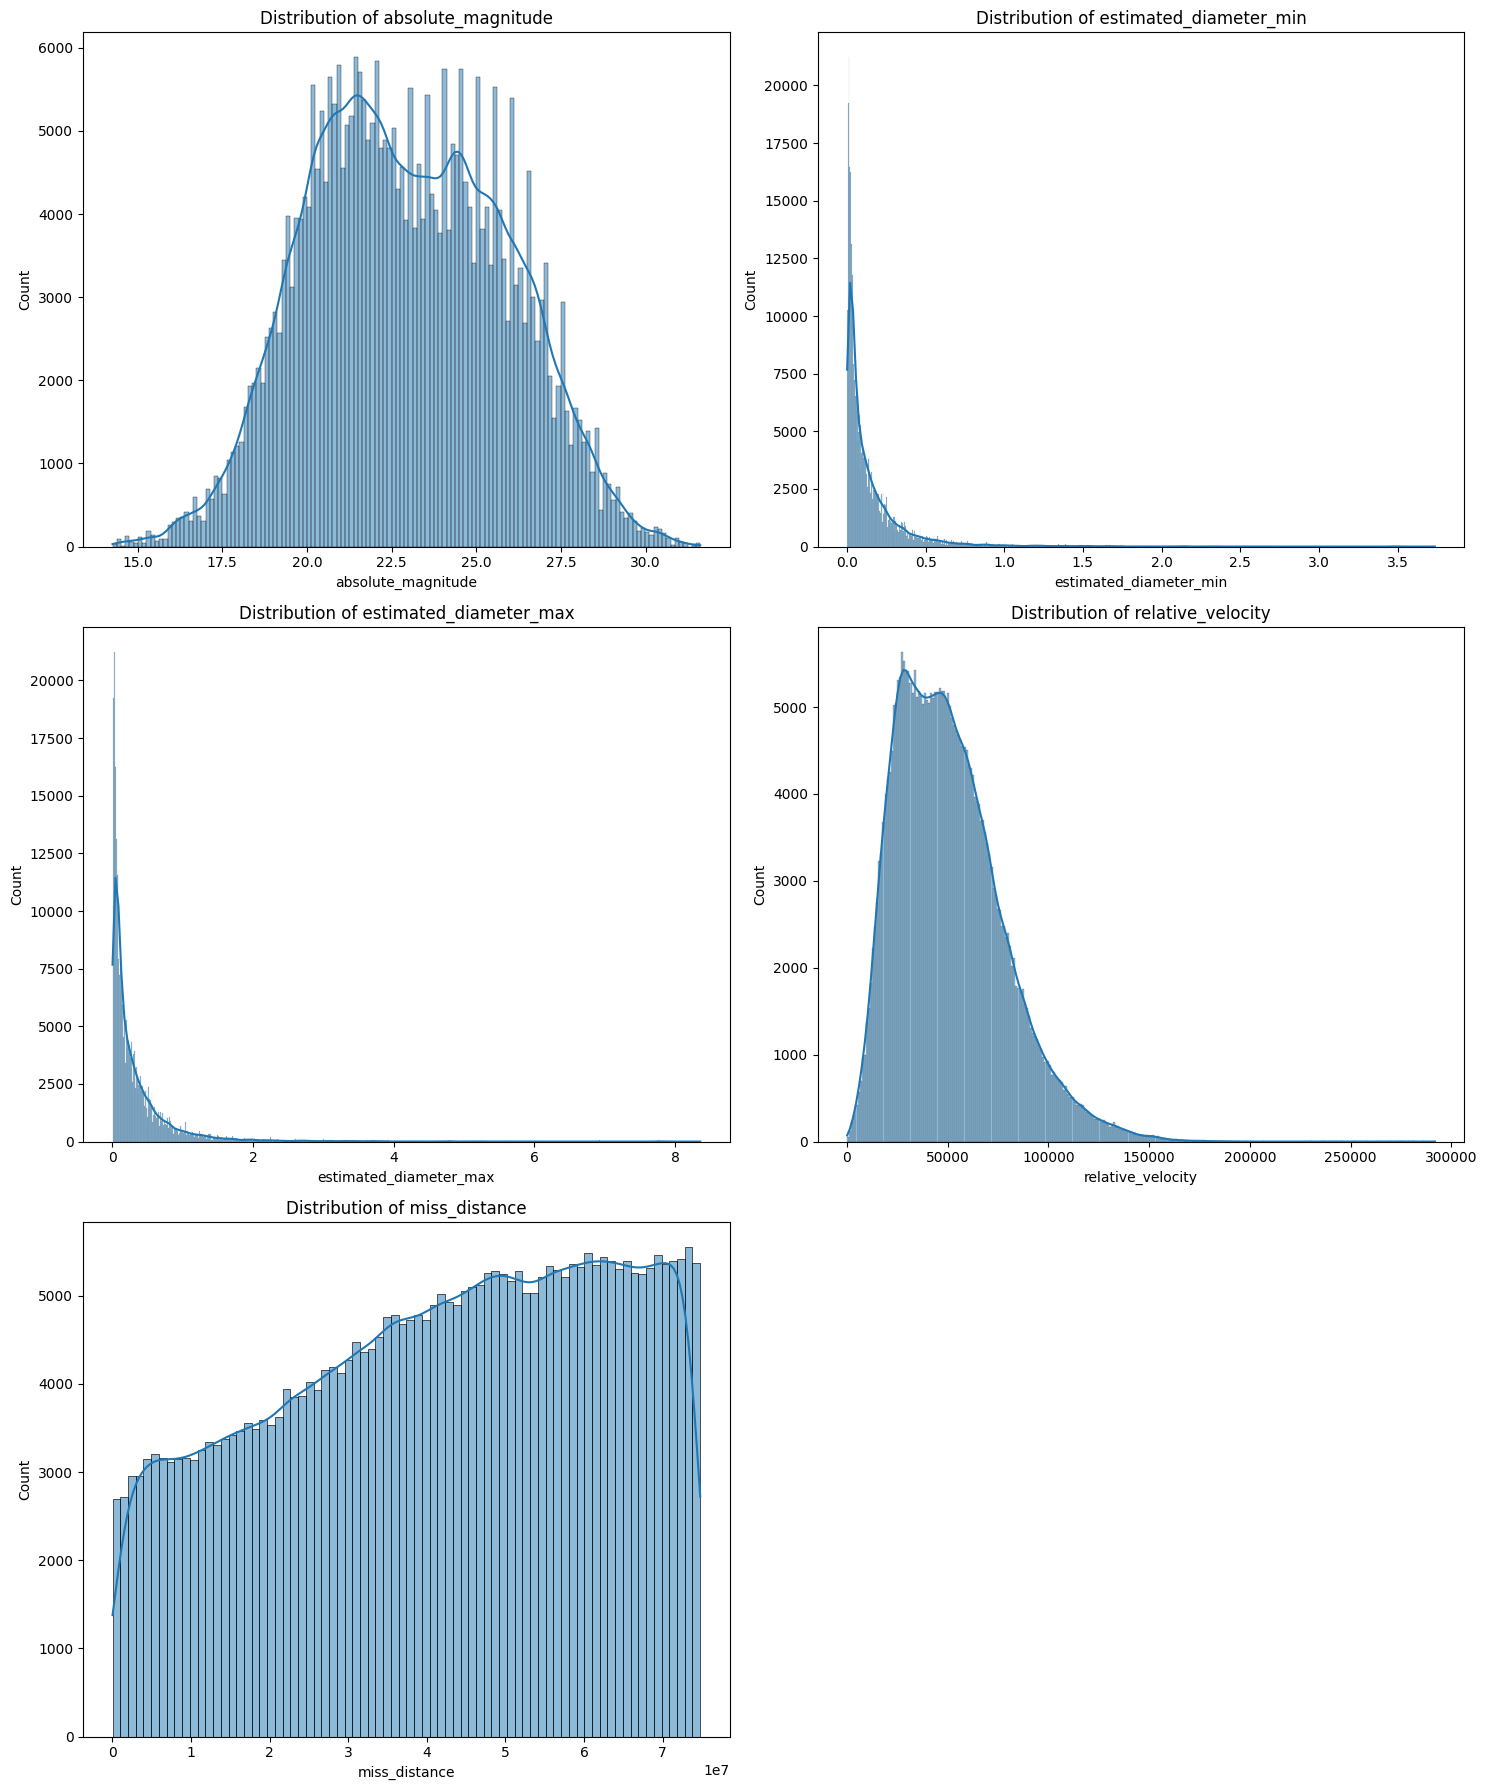

In [27]:
plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

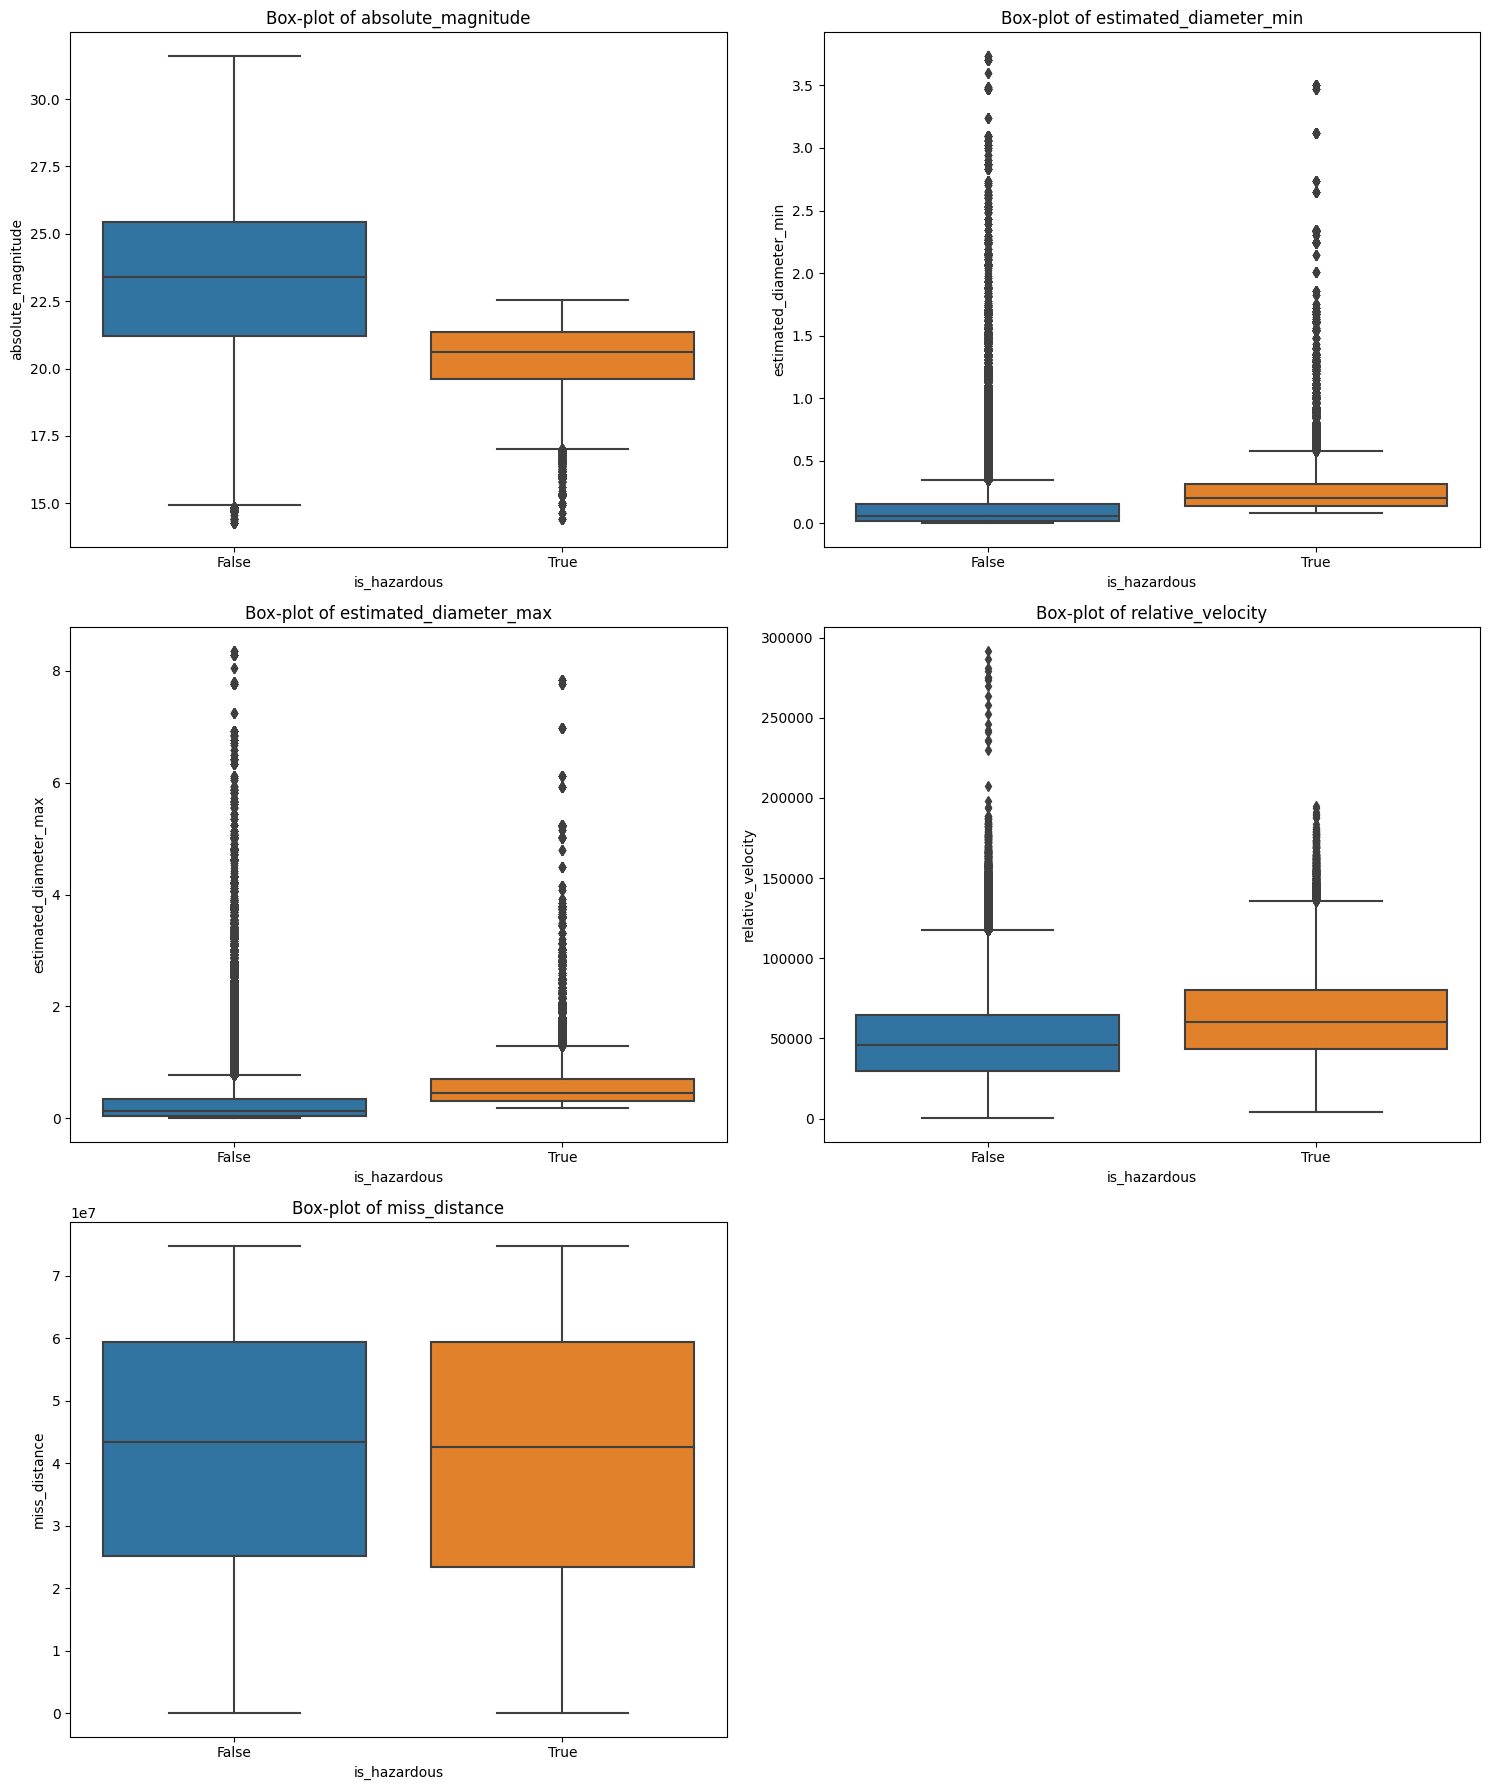

In [28]:

plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=Target_column,y=column,data=data)
    plt.title('Box-plot of {}'.format(column))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

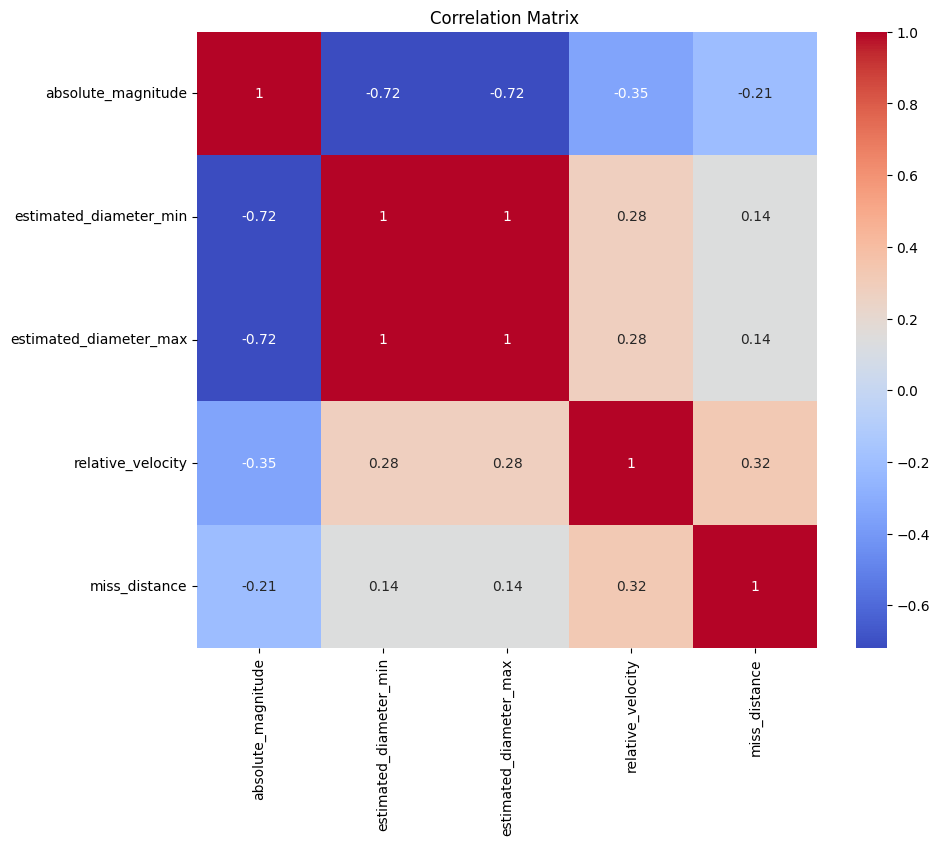

In [29]:
plt.figure(figsize=(10,8))
correlation_matrix = data[feature_columns].corr()
sns.heatmap(correlation_matrix , annot = True,cmap = 'coolwarm')
plt.title("Correlation Matrix ")
plt.show

In [30]:
# X=data.drop('is_hazardous',axis=1)
# Y=data['is_hazardous']
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# Y = encoder.fit_transform(Y)
# scaler = StandardScaler()

# X = scaler.fit_transform(X)
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, Y_train)

X=data.drop('is_hazardous',axis=1)
y=data['is_hazardous']
 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X=scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     58930
           1       0.72      0.59      0.65      8626

    accuracy                           0.92     67556
   macro avg       0.83      0.78      0.80     67556
weighted avg       0.91      0.92      0.92     67556

Accuracy: 0.92
